<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seaborn" data-toc-modified-id="Seaborn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Seaborn</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#用哪个？" data-toc-modified-id="用哪个？-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>用哪个？</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("fmri")
df.shape

(1064, 5)

In [3]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


数据仅拿来画图举例，不一定有实际意义。  
因此，我们可以假设：timepoint 为 X 轴； event 为 不同的主体；subject 为不同的类别（y 轴）。  
由于数据集不同的主体包含所有的类别，为了更好地说明问题，我们可以删除一些数据。

In [4]:
drop_ids = set(list(np.random.randint(df.shape[0], size=4000)))
len(drop_ids)

1044

In [5]:
# 去掉部分数据
df = df.drop(drop_ids)
df.shape

(20, 5)

In [6]:
subject_order = dict(zip(['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13'], 
                         range(14)))

## Seaborn

In [7]:
order = sorted(set(df.subject), key=lambda x: subject_order[x])
order

['s0', 's1', 's2', 's3', 's4', 's5', 's7', 's8', 's9', 's11', 's13']

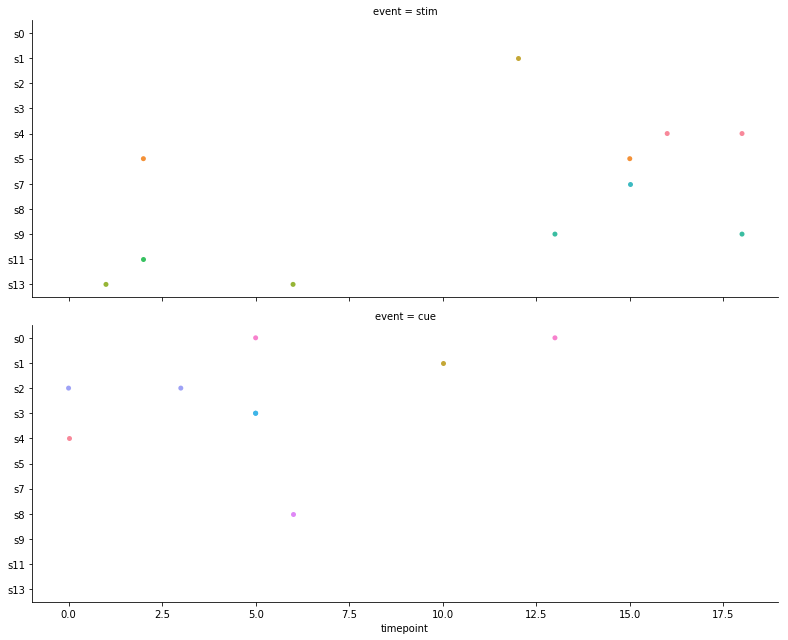

In [8]:
pic = sns.catplot(x="timepoint", y="subject", col="event", hue='subject',legend=False,
                  jitter=False, col_wrap=1, height=4.5, aspect=2.5, order=order, data=df);
pic.set(ylabel=None);

从图中我们可以发现能够满足需求：

- 多图
- 两幅图类别不一样
- 同一类别颜色标记一样
- 类别的顺序不一样

唯一需要注意的是：纵轴出现的类别是两个主体类别的并集。

## Matplotlib

In [9]:
# 首先需要指定颜色，重复使用了 4 个
color = dict(zip(range(14),['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 
 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red']))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


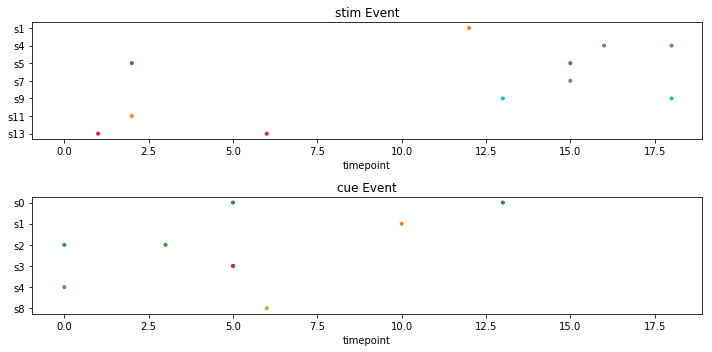

In [10]:
plt.figure(figsize=(10, 5), );
for i, event in enumerate(sorted(set(df.event), reverse=True)):
    data = df[df.event==event]
    ys = sorted(set(data.subject), key=lambda x: subject_order[x], reverse=True)
    data['y'] = data['subject'].apply(lambda x : dict(zip(ys, range(len(ys))))[x]) # y 轴替换为数字
    co = [color[subject_order[x]] for x in data.subject] # 确定各类别颜色
    if i == 0:
        ax = plt.subplot(len(set(df.event)), 1, i+1)
    else:
        ax = plt.subplot(len(set(df.event)), 1, i+1, sharex=ax) # 共享 x 轴
    plt.scatter(data.timepoint, data.y, c=co, marker='.')
    plt.yticks(range(len(ys)), ys) # 将 y 轴的数字替换为 文本类别
    plt.xlabel('timepoint')
    plt.title(event + ' Event')
plt.tight_layout()

从图中我们可以发现也能够满足需求，与 Seaborn 绘制出来的图不一样的地方在于，Matplotlib 的图 y 轴只会出现该主体有的类别。  

这里有一点需要特别注意一下：直接使用 df.subject 作为 y 轴也可以画图，但是顺序不是我们要的排列顺序；如果使用了 df.suject 作为 y 轴，同时也使用了 plt.yticks 做了替换，但实际绘制的结果是错误的。

## 用哪个？

这两个效果其实是一样的，Seaborn 代码更加简单些（当然决定我们选择的肯定不是这个原因）。我觉得是这样：如果 y 轴的对比信息非常关键，那么选择 Seaborn 会更清晰些，你可以很直观地看到每幅图缺少哪些类别；相反，如果更关注趋势，那么 Matplotlib 的结果看起来更加紧凑些。